# Supplementary Figure - Vary Number of units in RNN

May 24, 2022

In [1]:
folder = 'figs-2022-5-24/'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator,FixedFormatter
import matplotlib.pylab as pylab

# analysis
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.linear_model import LinearRegression
from scipy import interpolate # don't import stats
from scipy import linalg as LA
from scipy.ndimage.filters import uniform_filter1d

# miscellaneous
from tqdm import tqdm
from itertools import cycle
from copy import deepcopy
import pickle

import logging
import warnings
import dataclasses
from dataclasses import dataclass
from typing import Optional, List

import sys
sys.path.append("../..")

In [3]:
from rnn import RNNparams, RNN
from task import Task
from simulation import Simulation
from algorithms.bptt import BPTT
from algorithms.rflo import RFLO
from algorithms.reinforce import REINFORCE
from algorithms.track_vars import TrackVars

from utils.plotting import plot_trained_trajectories, paper_format
from utils.metric import cos_sim, return_norm_and_angle
from utils.functions import choose_aligned_matrix

from utils.metric import cos_sim, flow_field_data, flow_field_predicted, calculate_flow_field_correlation


# Vary Recurrent units of RFLO with fixed M

In [4]:
trial_duration = 20
n_in=4
frac_on = 0.2

x_tonic = 0.0*np.ones((trial_duration, n_in)) # shape 20 x 4 i.e. time x channel
x_pulse1 = x_tonic.copy()
x_pulse2 = x_tonic.copy()
x_pulse3 = x_tonic.copy()
x_pulse4 = x_tonic.copy()
x_pulse1[0:int(trial_duration*frac_on),0] = 1
x_pulse2[0:int(trial_duration*frac_on),1] = 1
x_pulse3[0:int(trial_duration*frac_on),2] = 1
x_pulse4[0:int(trial_duration*frac_on),3] = 1

task1 = Task(x_in=x_pulse1,y_target=np.asarray([[1],[1]]))
task2 = Task(x_in=x_pulse2,y_target=np.asarray([[-1],[1]]))
task3 = Task(x_in=x_pulse3,y_target=np.asarray([[1],[-1]]))
task4 = Task(x_in=x_pulse4,y_target=np.asarray([[-1],[-1]]))

12it [00:00, 119.37it/s]

n_in: 4
n_rec: 25
n_out: 2
sig_in: 0.0
sig_rec: 0.1
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7ff93ef223a8>
>> num units: 25.00


2500it [00:12, 197.92it/s]
18it [00:00, 178.84it/s]

M norm: 1.12	 M angle: 0.51, 6 iterations
w_out1 norm: 1.52	 w_out vs. w_out1 angle: 0.49
w_m norm: 1.12	 w_out1 vs. w_m angle: 0.51
w_m norm: 1.85	 w_out vs. w_m angle: 0.08

500it [00:01, 262.95it/s]
2000it [00:10, 183.67it/s]
500it [00:01, 254.56it/s]


AR early fit 0.965, late fit 0.982


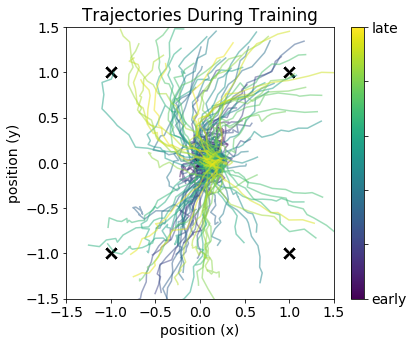

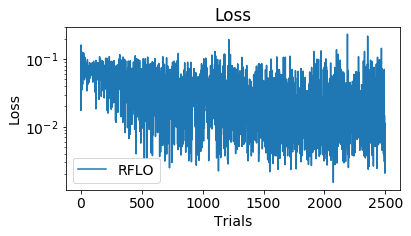

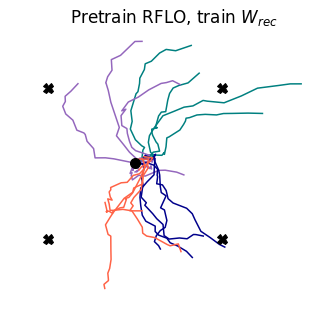

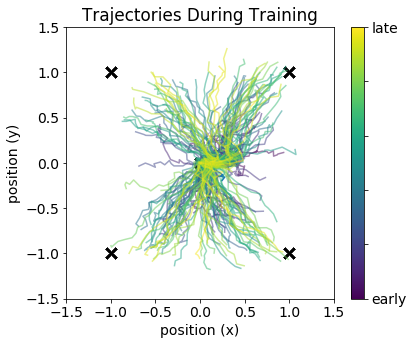

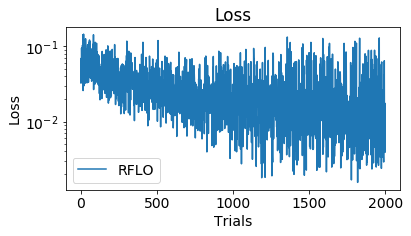

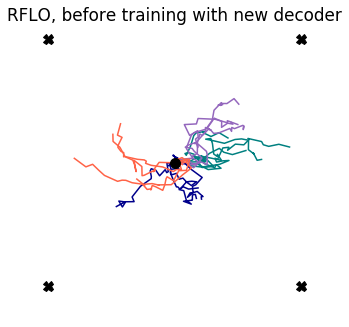

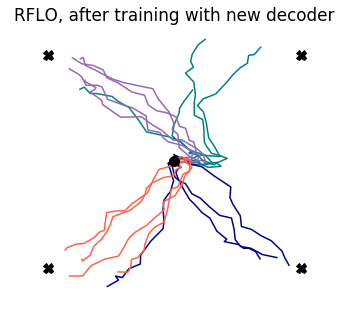

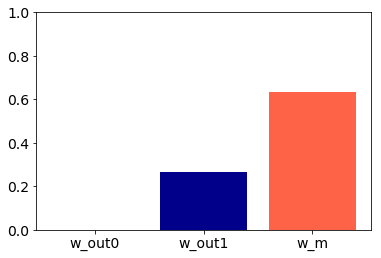

7it [00:00, 64.93it/s]

n_in: 4
n_rec: 50
n_out: 2
sig_in: 0.0
sig_rec: 0.1
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7ff93b87fa20>
>> num units: 50.00


2000it [00:19, 105.22it/s]
9it [00:00, 84.63it/s]

M norm: 1.21	 M angle: 0.49, 34 iterations
w_out1 norm: 1.52	 w_out vs. w_out1 angle: 0.51
w_m norm: 1.21	 w_out1 vs. w_m angle: 0.49
w_m norm: 1.85	 w_out vs. w_m angle: 0.11

500it [00:03, 126.98it/s]
1500it [00:15, 96.81it/s]
500it [00:03, 128.47it/s]


AR early fit 0.958, late fit 0.974


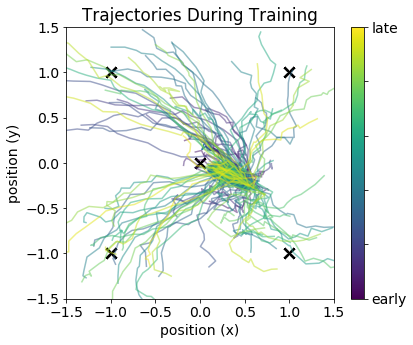

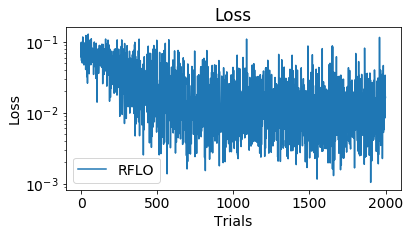

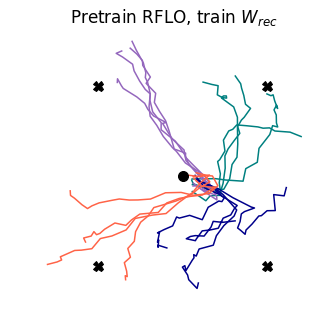

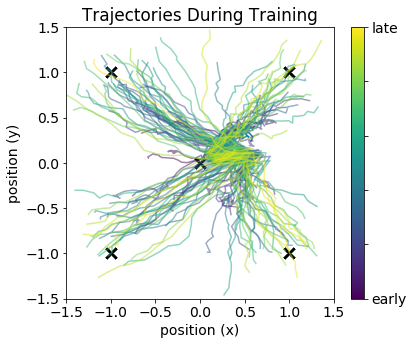

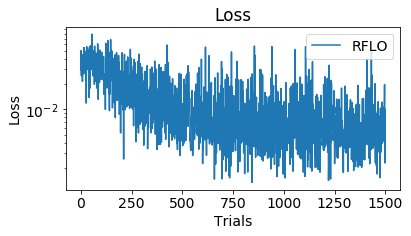

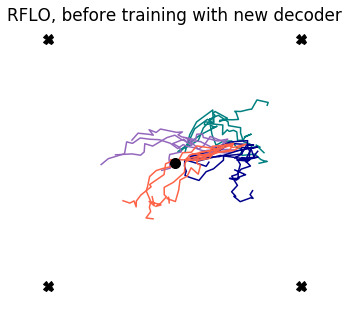

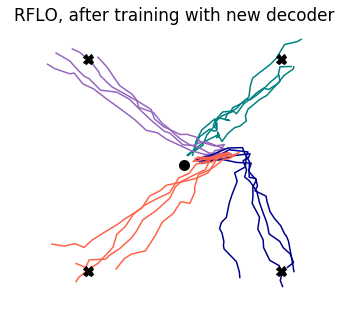

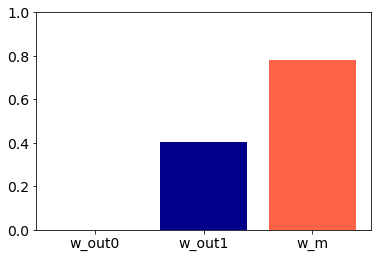

4it [00:00, 35.91it/s]

n_in: 4
n_rec: 100
n_out: 2
sig_in: 0.0
sig_rec: 0.1
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7ff942010678>
>> num units: 100.00


1000it [00:21, 47.02it/s]
6it [00:00, 53.50it/s]

M norm: 1.10	 M angle: 0.49, 19 iterations
w_out1 norm: 1.41	 w_out vs. w_out1 angle: 0.50
w_m norm: 1.10	 w_out1 vs. w_m angle: 0.49
w_m norm: 1.57	 w_out vs. w_m angle: 0.29

500it [00:09, 54.68it/s]
1000it [00:19, 50.37it/s]
500it [00:08, 60.68it/s]


AR early fit 0.952, late fit 0.980


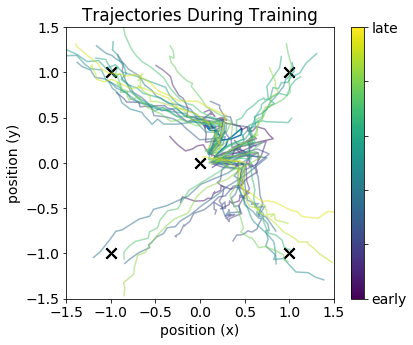

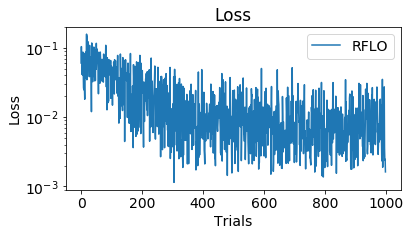

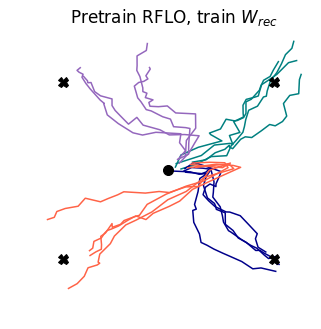

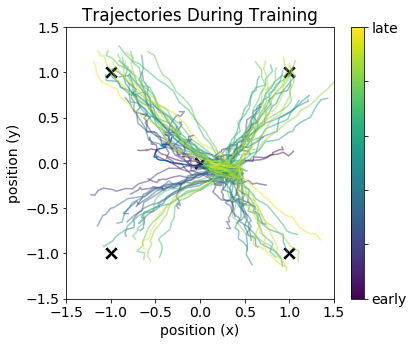

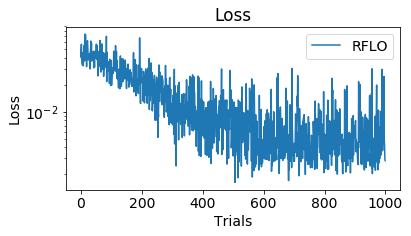

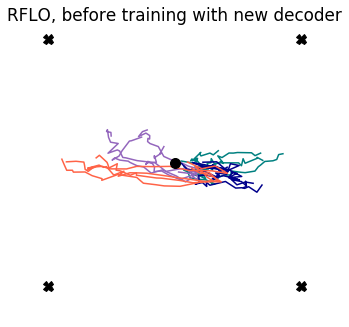

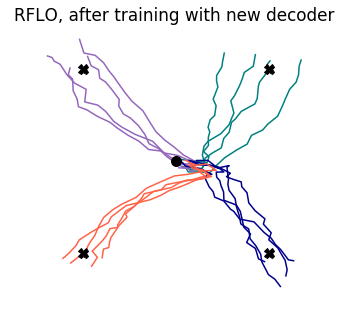

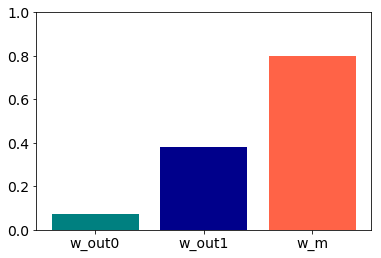

2it [00:00, 12.43it/s]

n_in: 4
n_rec: 200
n_out: 2
sig_in: 0.0
sig_rec: 0.1
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7ff9406f9b40>
>> num units: 200.00


500it [00:34, 14.61it/s]
2it [00:00, 15.32it/s]

M norm: 1.13	 M angle: 0.51, 6 iterations
w_out1 norm: 1.47	 w_out vs. w_out1 angle: 0.49
w_m norm: 1.13	 w_out1 vs. w_m angle: 0.51
w_m norm: 1.69	 w_out vs. w_m angle: 0.24

500it [00:31, 15.93it/s]
500it [00:36, 14.03it/s]
500it [00:31, 15.98it/s]


AR early fit 0.945, late fit 0.962


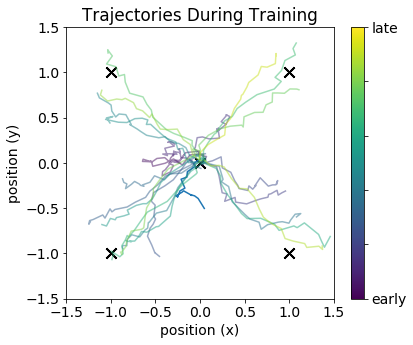

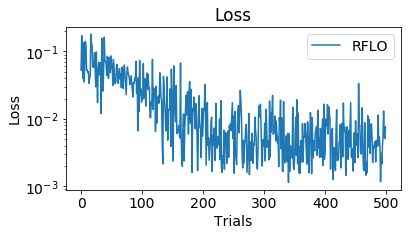

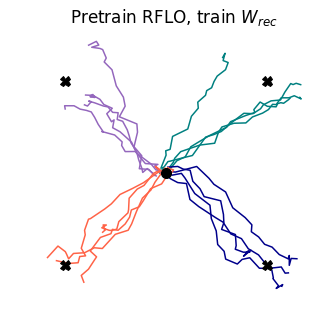

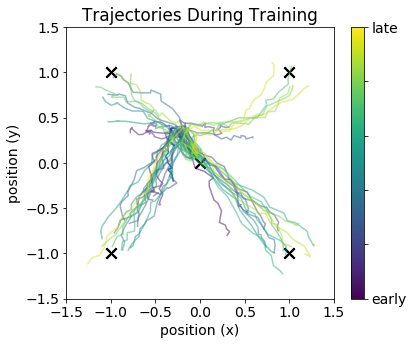

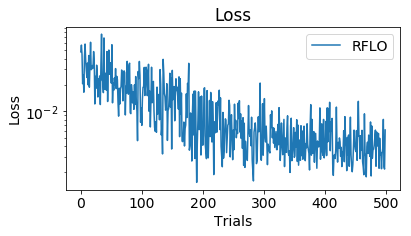

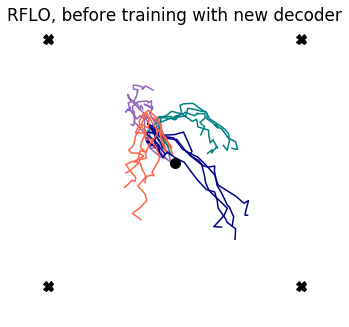

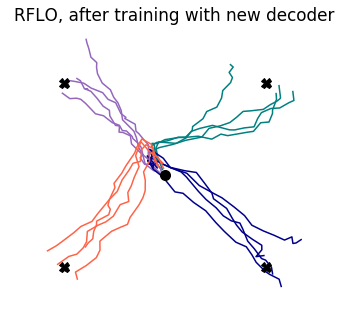

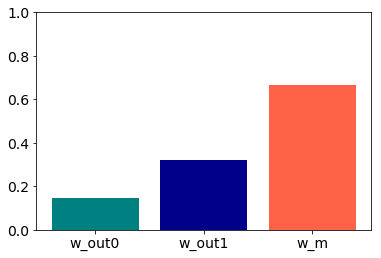

12it [00:00, 116.06it/s]

n_in: 4
n_rec: 25
n_out: 2
sig_in: 0.0
sig_rec: 0.1
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7ff9400f23f0>
>> num units: 25.00


2500it [00:12, 198.60it/s]
12it [00:00, 114.88it/s]

M norm: 1.27	 M angle: 0.50, 78 iterations
w_out1 norm: 1.53	 w_out vs. w_out1 angle: 0.51
w_m norm: 1.27	 w_out1 vs. w_m angle: 0.50
w_m norm: 1.78	 w_out vs. w_m angle: 0.24

500it [00:01, 263.36it/s]
2000it [00:10, 187.67it/s]
500it [00:01, 271.86it/s]


AR early fit 0.965, late fit 0.978


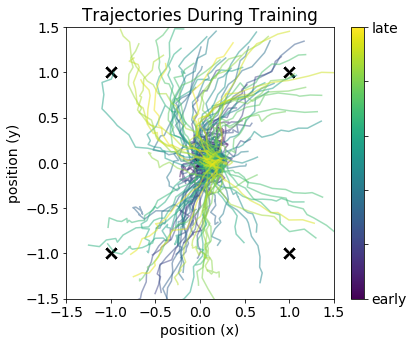

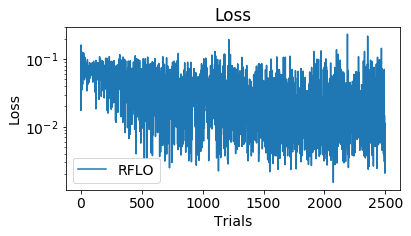

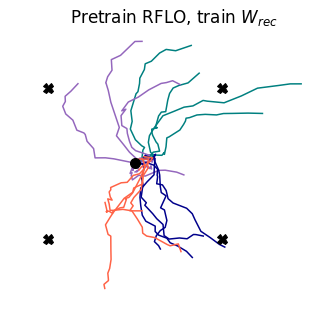

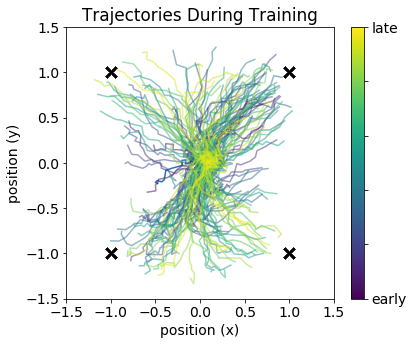

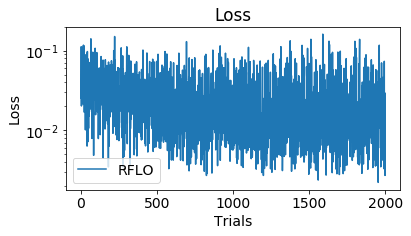

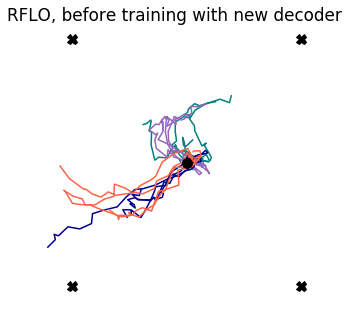

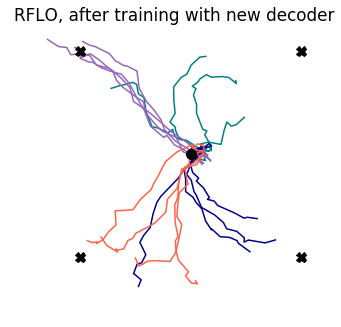

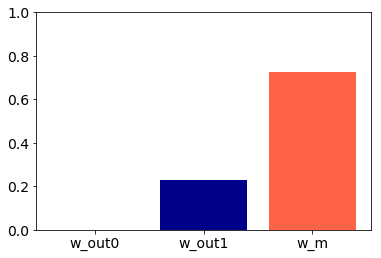

7it [00:00, 67.73it/s]

n_in: 4
n_rec: 50
n_out: 2
sig_in: 0.0
sig_rec: 0.1
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7ff941c1f630>
>> num units: 50.00


2000it [00:19, 102.79it/s]
9it [00:00, 86.50it/s]

M norm: 1.19	 M angle: 0.50, 36 iterations
w_out1 norm: 1.51	 w_out vs. w_out1 angle: 0.51
w_m norm: 1.19	 w_out1 vs. w_m angle: 0.50
w_m norm: 1.72	 w_out vs. w_m angle: 0.26

500it [00:03, 127.92it/s]
1500it [00:15, 97.23it/s] 
500it [00:03, 128.99it/s]


AR early fit 0.958, late fit 0.979


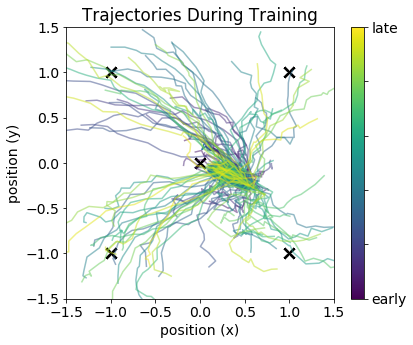

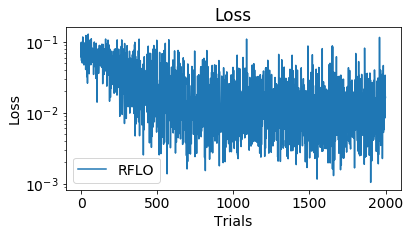

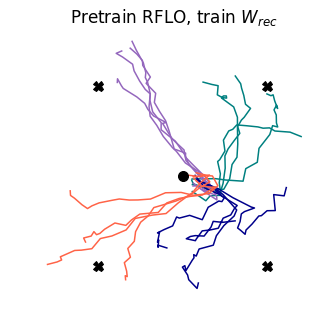

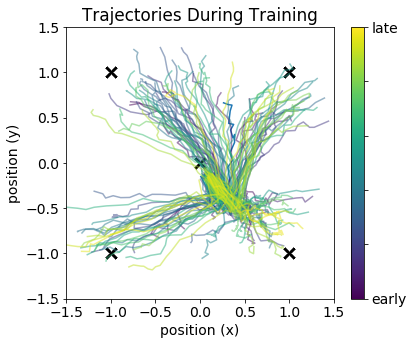

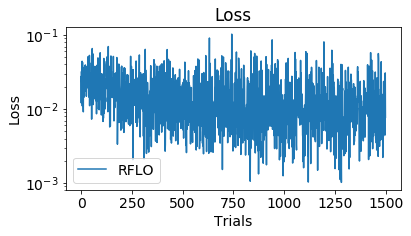

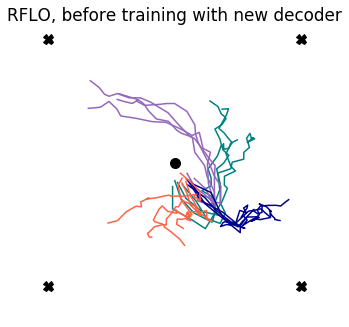

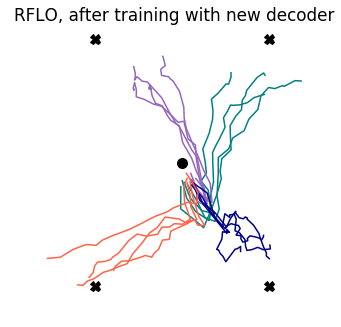

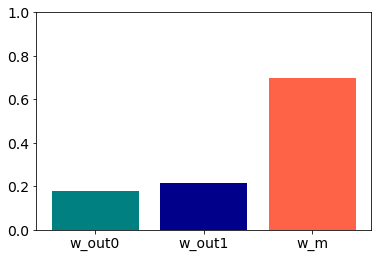

4it [00:00, 36.87it/s]

n_in: 4
n_rec: 100
n_out: 2
sig_in: 0.0
sig_rec: 0.1
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7ff9400c54c8>
>> num units: 100.00


1000it [00:19, 50.00it/s]
5it [00:00, 49.41it/s]

M norm: 1.07	 M angle: 0.51, 33 iterations
w_out1 norm: 1.39	 w_out vs. w_out1 angle: 0.50
w_m norm: 1.07	 w_out1 vs. w_m angle: 0.51
w_m norm: 1.56	 w_out vs. w_m angle: 0.31

500it [00:08, 60.15it/s]
1000it [00:19, 50.21it/s]
500it [00:08, 60.03it/s]


AR early fit 0.952, late fit 0.970


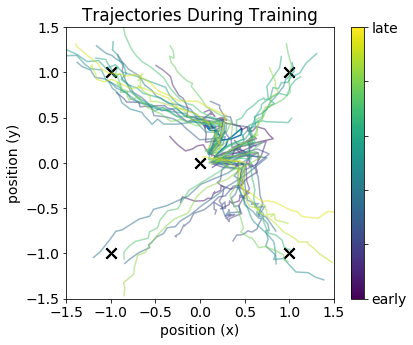

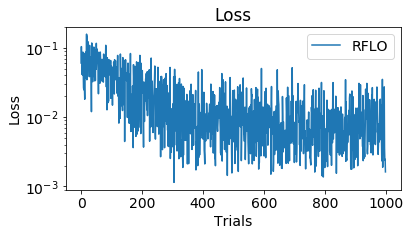

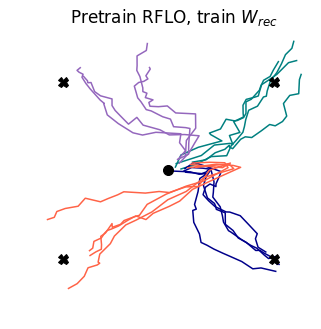

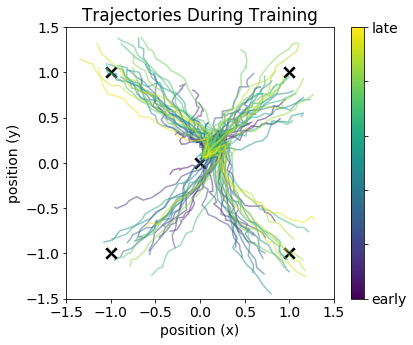

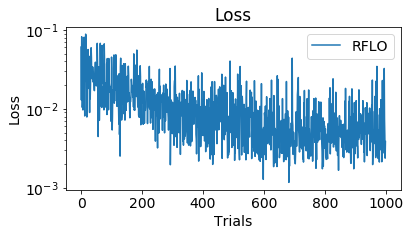

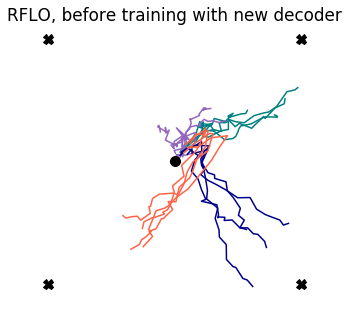

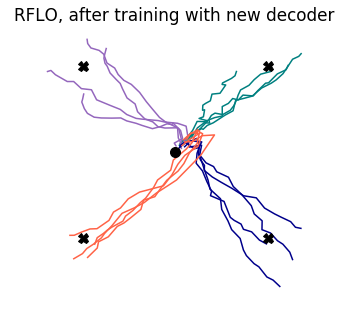

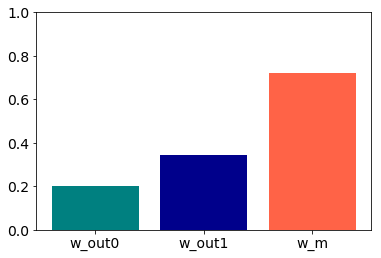

1it [00:00,  9.70it/s]

n_in: 4
n_rec: 200
n_out: 2
sig_in: 0.0
sig_rec: 0.1
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7ff940b8efc0>
>> num units: 200.00


500it [00:35, 14.17it/s]
0it [00:00, ?it/s]

M norm: 1.11	 M angle: 0.51, 1 iterations
w_out1 norm: 1.46	 w_out vs. w_out1 angle: 0.50
w_m norm: 1.11	 w_out1 vs. w_m angle: 0.51
w_m norm: 1.69	 w_out vs. w_m angle: 0.23

500it [00:30, 16.37it/s]
500it [00:35, 14.17it/s]
500it [00:30, 16.33it/s]


AR early fit 0.945, late fit 0.960


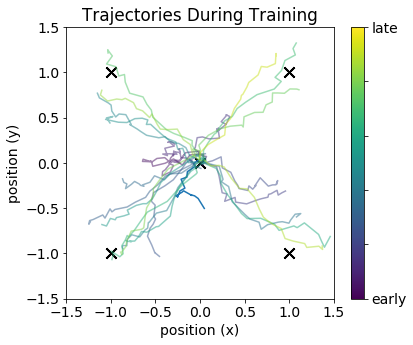

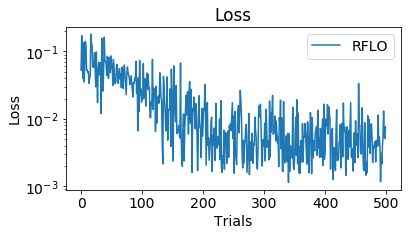

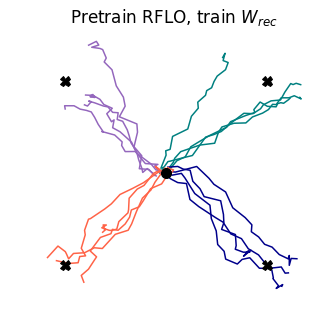

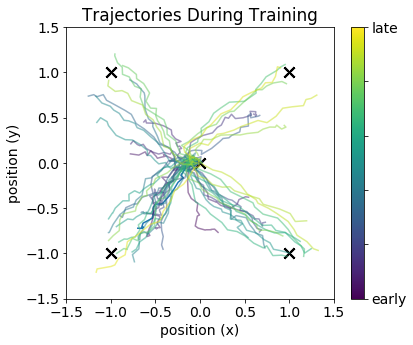

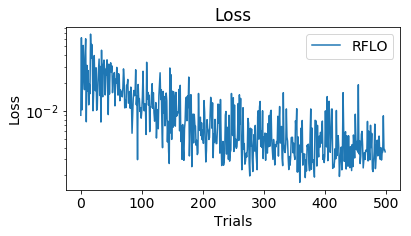

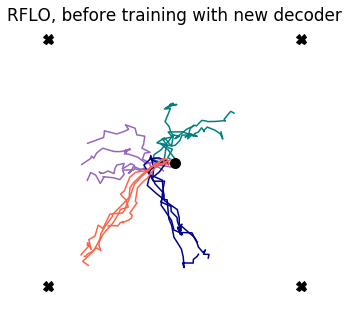

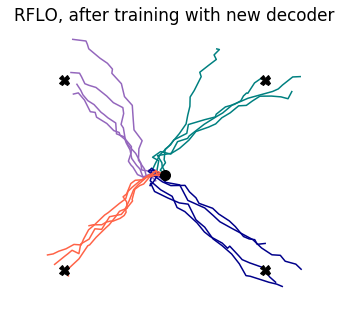

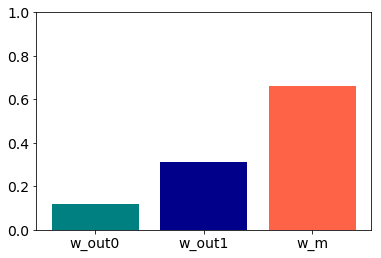

13it [00:00, 123.79it/s]

n_in: 4
n_rec: 25
n_out: 2
sig_in: 0.0
sig_rec: 0.1
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7ff941cc3438>
>> num units: 25.00


2500it [00:12, 203.40it/s]
17it [00:00, 169.21it/s]

M norm: 1.20	 M angle: 0.49, 2 iterations
w_out1 norm: 1.52	 w_out vs. w_out1 angle: 0.51
w_m norm: 1.20	 w_out1 vs. w_m angle: 0.49
w_m norm: 1.80	 w_out vs. w_m angle: 0.16

500it [00:01, 270.08it/s]
2000it [00:11, 179.61it/s]
500it [00:01, 274.83it/s]


AR early fit 0.965, late fit 0.984


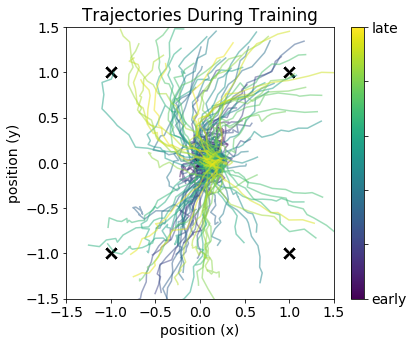

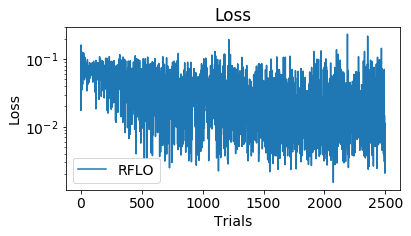

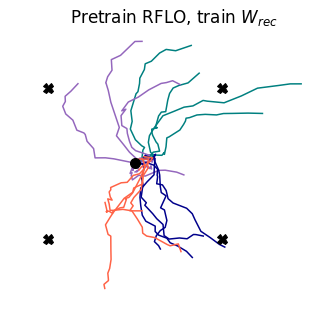

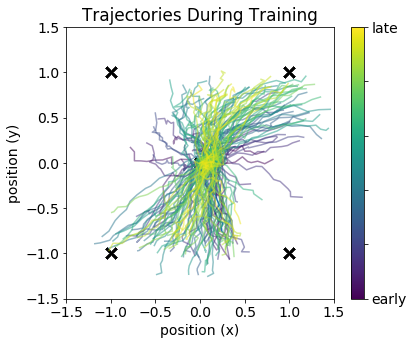

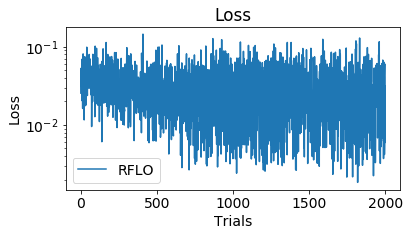

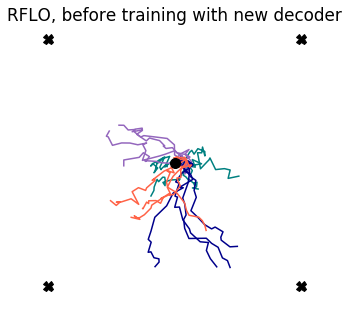

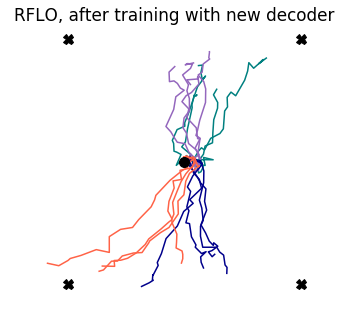

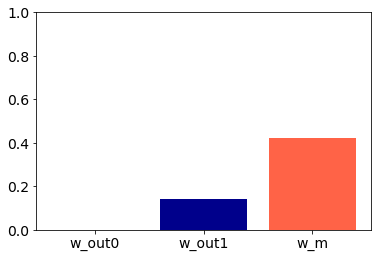

7it [00:00, 65.65it/s]

n_in: 4
n_rec: 50
n_out: 2
sig_in: 0.0
sig_rec: 0.1
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7ff940c12360>
>> num units: 50.00


2000it [00:18, 105.43it/s]
12it [00:00, 114.00it/s]

M norm: 1.20	 M angle: 0.50, 3 iterations
w_out1 norm: 1.52	 w_out vs. w_out1 angle: 0.50
w_m norm: 1.20	 w_out1 vs. w_m angle: 0.50
w_m norm: 1.73	 w_out vs. w_m angle: 0.26

500it [00:03, 125.68it/s]
1500it [00:14, 100.36it/s]
500it [00:03, 129.63it/s]


AR early fit 0.958, late fit 0.982


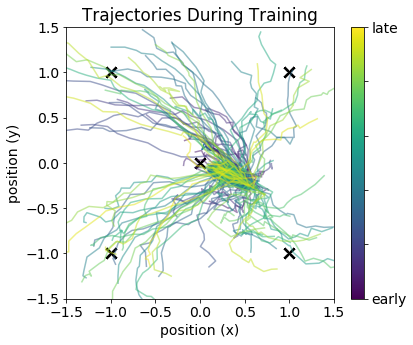

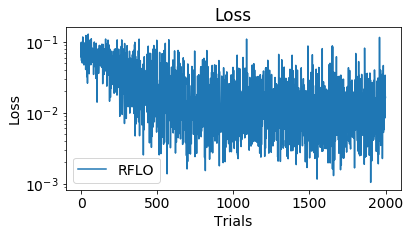

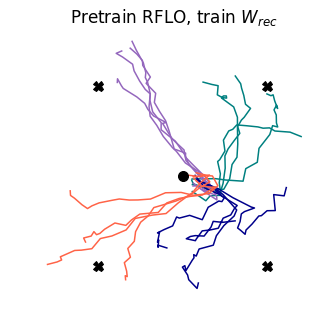

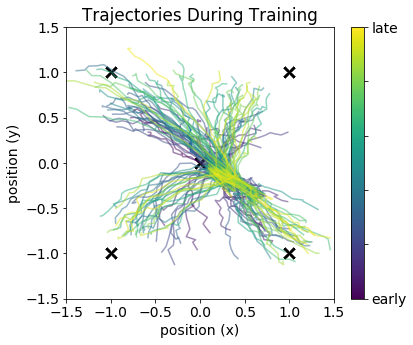

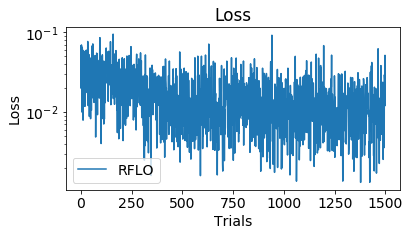

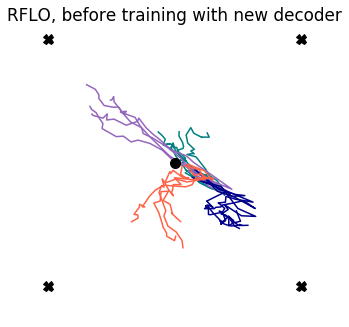

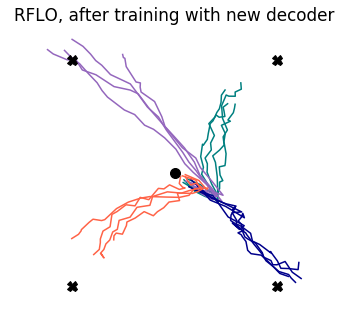

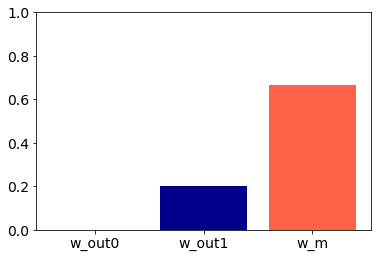

4it [00:00, 33.69it/s]

n_in: 4
n_rec: 100
n_out: 2
sig_in: 0.0
sig_rec: 0.1
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7ff941bd58b8>
>> num units: 100.00


1000it [00:19, 50.65it/s]
5it [00:00, 48.54it/s]

M norm: 1.04	 M angle: 0.50, 15 iterations
w_out1 norm: 1.38	 w_out vs. w_out1 angle: 0.50
w_m norm: 1.04	 w_out1 vs. w_m angle: 0.50
w_m norm: 1.60	 w_out vs. w_m angle: 0.26

500it [00:08, 59.41it/s]
1000it [00:20, 49.03it/s]
500it [00:08, 58.74it/s]


AR early fit 0.952, late fit 0.976


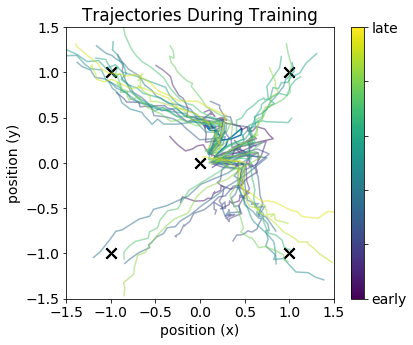

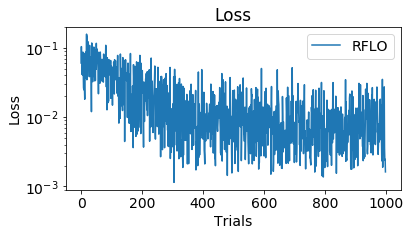

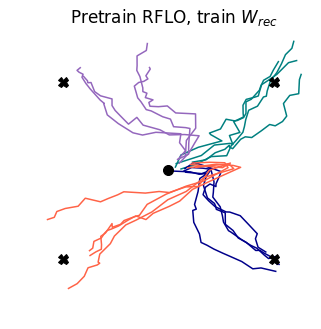

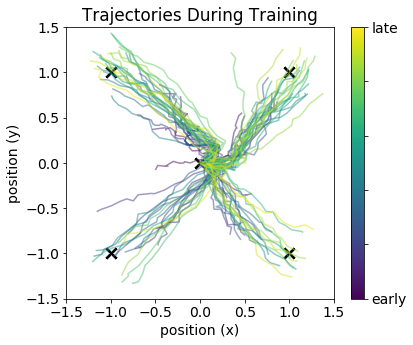

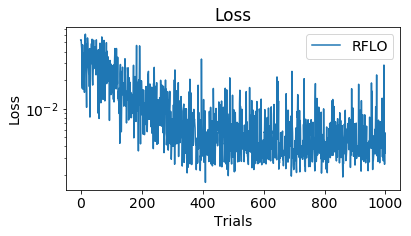

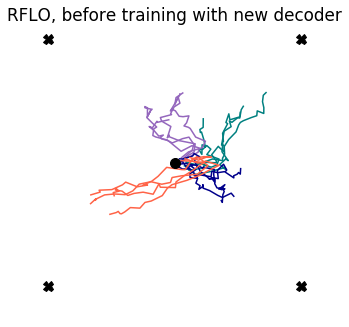

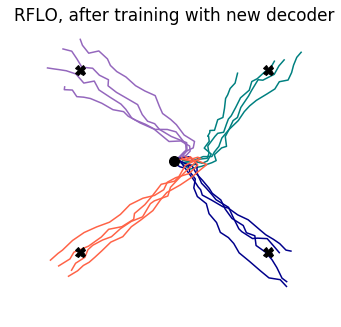

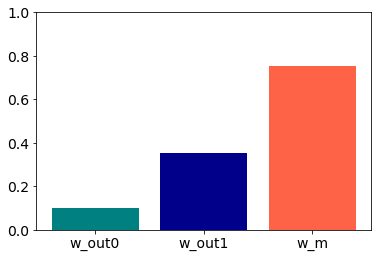

1it [00:00,  6.11it/s]

n_in: 4
n_rec: 200
n_out: 2
sig_in: 0.0
sig_rec: 0.1
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7ff941bd5318>
>> num units: 200.00


500it [00:35, 14.26it/s]
2it [00:00, 14.49it/s]

M norm: 1.10	 M angle: 0.50, 3 iterations
w_out1 norm: 1.44	 w_out vs. w_out1 angle: 0.51
w_m norm: 1.10	 w_out1 vs. w_m angle: 0.50
w_m norm: 1.65	 w_out vs. w_m angle: 0.27

500it [00:31, 14.83it/s]
500it [00:35, 14.14it/s]
500it [00:30, 16.25it/s]


AR early fit 0.945, late fit 0.965


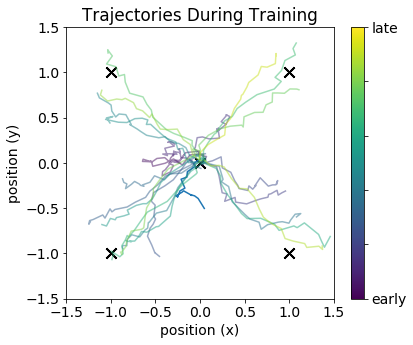

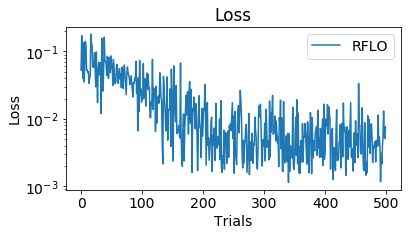

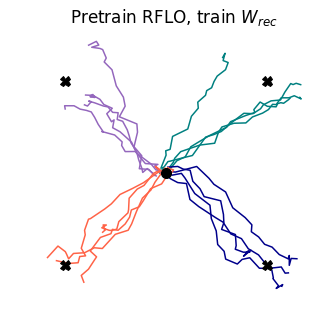

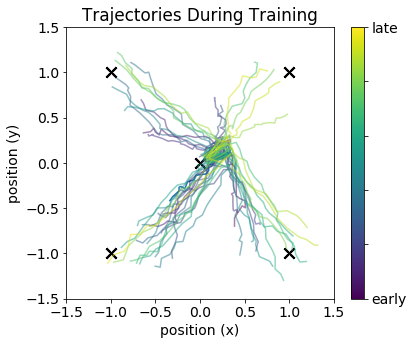

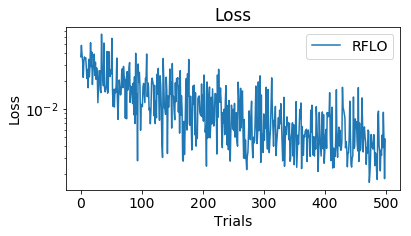

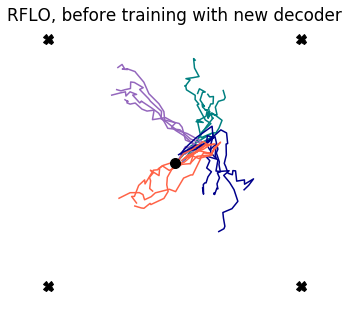

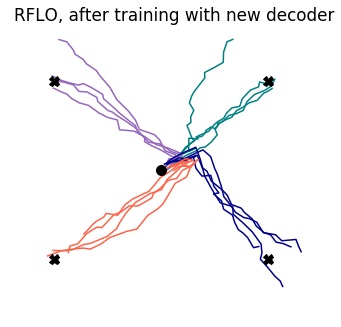

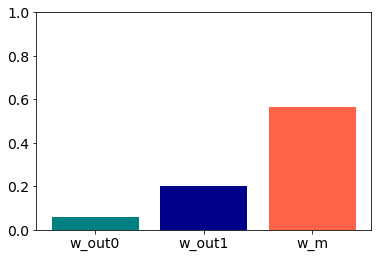

10it [00:00, 99.63it/s]

n_in: 4
n_rec: 25
n_out: 2
sig_in: 0.0
sig_rec: 0.1
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7ff946e93d38>
>> num units: 25.00


2500it [00:12, 202.58it/s]
18it [00:00, 179.34it/s]

M norm: 1.23	 M angle: 0.49, 1 iterations
w_out1 norm: 1.53	 w_out vs. w_out1 angle: 0.50
w_m norm: 1.23	 w_out1 vs. w_m angle: 0.49
w_m norm: 1.65	 w_out vs. w_m angle: 0.33

500it [00:01, 265.03it/s]
2000it [00:10, 188.03it/s]
500it [00:01, 273.72it/s]


AR early fit 0.965, late fit 0.980


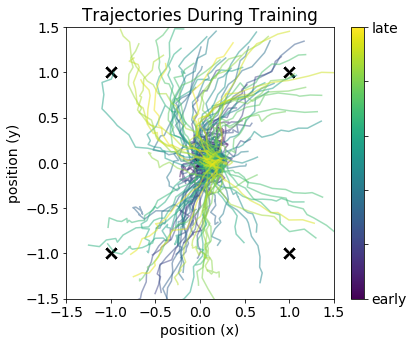

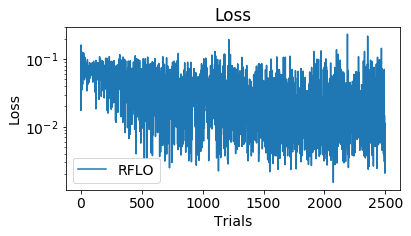

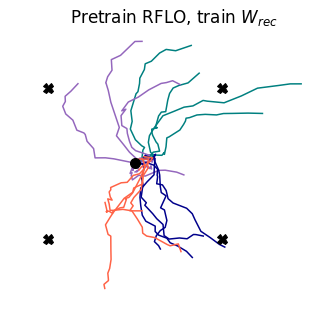

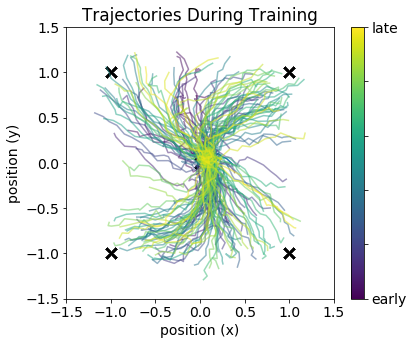

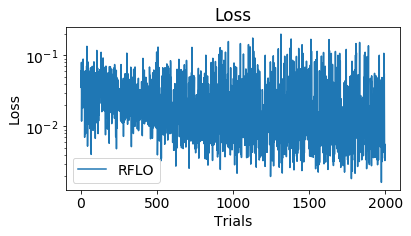

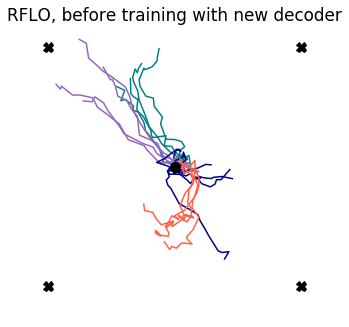

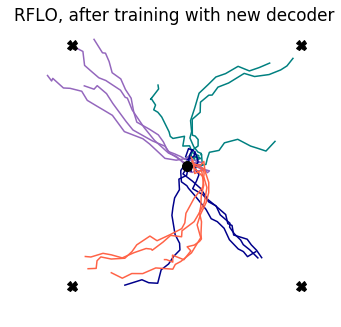

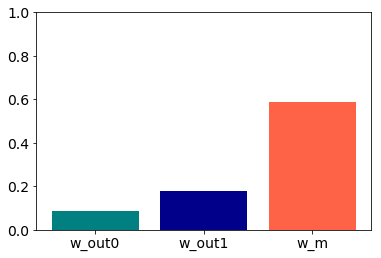

7it [00:00, 65.81it/s]

n_in: 4
n_rec: 50
n_out: 2
sig_in: 0.0
sig_rec: 0.1
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7ff93f861fc0>
>> num units: 50.00


2000it [00:19, 103.44it/s]
6it [00:00, 55.81it/s]

M norm: 1.11	 M angle: 0.49, 5 iterations
w_out1 norm: 1.49	 w_out vs. w_out1 angle: 0.50
w_m norm: 1.11	 w_out1 vs. w_m angle: 0.49
w_m norm: 1.77	 w_out vs. w_m angle: 0.19

500it [00:03, 125.19it/s]
1500it [00:14, 100.39it/s]
500it [00:03, 123.16it/s]


AR early fit 0.958, late fit 0.981


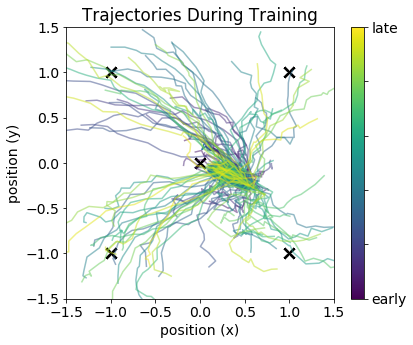

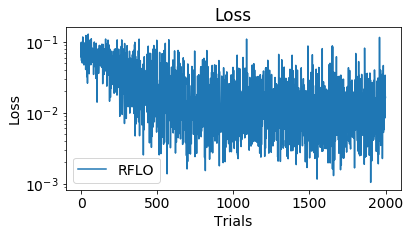

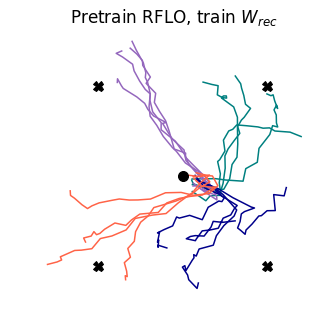

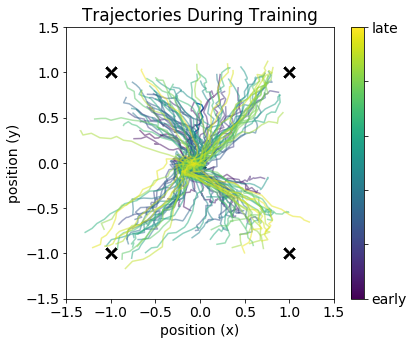

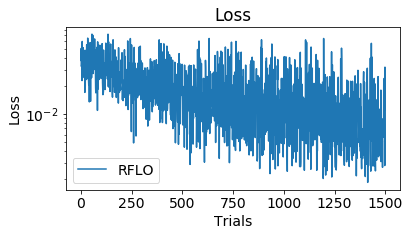

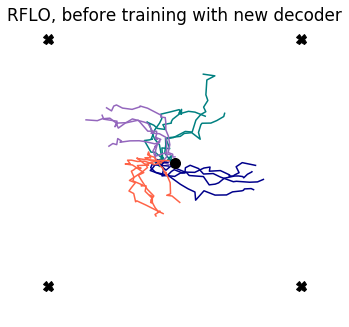

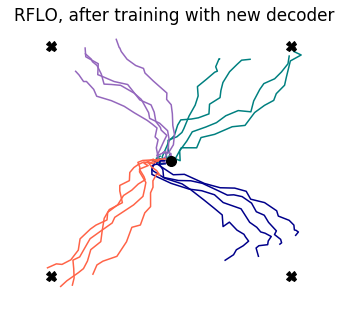

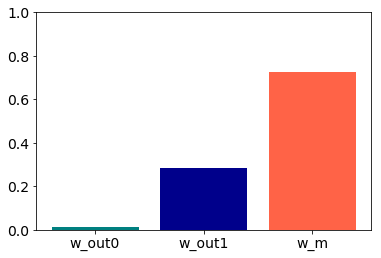

4it [00:00, 36.52it/s]

n_in: 4
n_rec: 100
n_out: 2
sig_in: 0.0
sig_rec: 0.1
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7ff94661e240>
>> num units: 100.00


1000it [00:19, 51.42it/s]
6it [00:00, 55.22it/s]

M norm: 1.08	 M angle: 0.50, 8 iterations
w_out1 norm: 1.40	 w_out vs. w_out1 angle: 0.50
w_m norm: 1.08	 w_out1 vs. w_m angle: 0.50
w_m norm: 1.66	 w_out vs. w_m angle: 0.20

500it [00:08, 60.08it/s]
1000it [00:20, 49.54it/s]
500it [00:08, 59.60it/s]


AR early fit 0.952, late fit 0.972


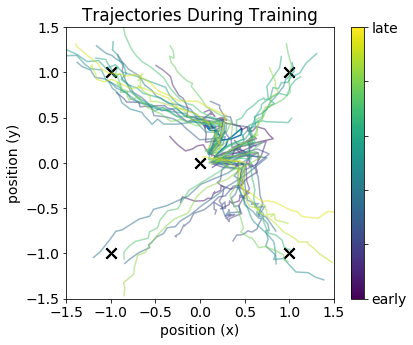

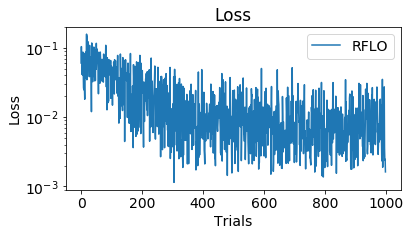

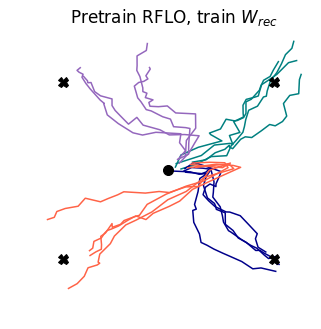

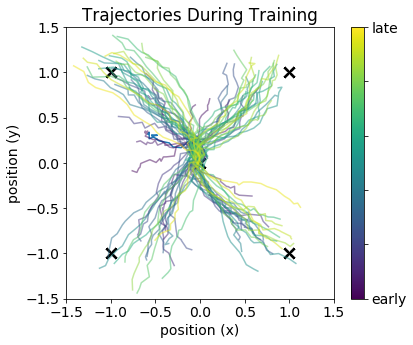

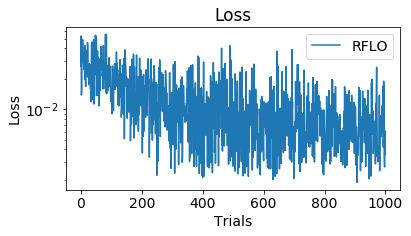

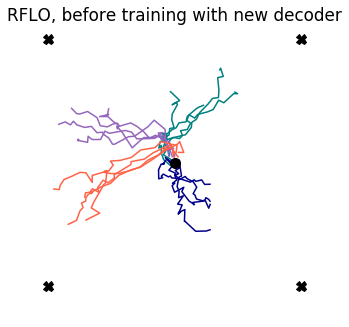

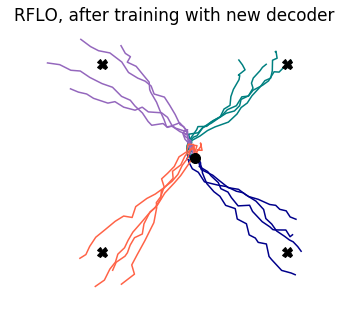

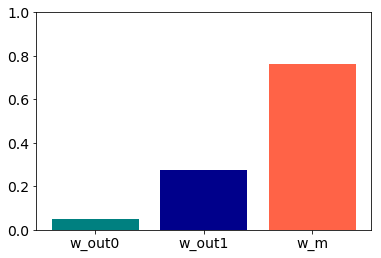

1it [00:00,  9.83it/s]

n_in: 4
n_rec: 200
n_out: 2
sig_in: 0.0
sig_rec: 0.1
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7ff919845a68>
>> num units: 200.00


500it [00:35, 14.18it/s]
2it [00:00, 14.03it/s]

M norm: 1.08	 M angle: 0.51, 6 iterations
w_out1 norm: 1.44	 w_out vs. w_out1 angle: 0.51
w_m norm: 1.08	 w_out1 vs. w_m angle: 0.51
w_m norm: 1.68	 w_out vs. w_m angle: 0.24

500it [00:30, 16.47it/s]
500it [00:35, 13.93it/s]
500it [00:30, 16.45it/s]


AR early fit 0.945, late fit 0.962


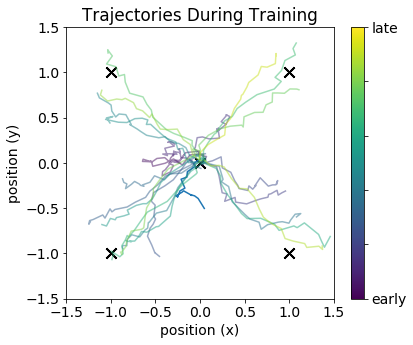

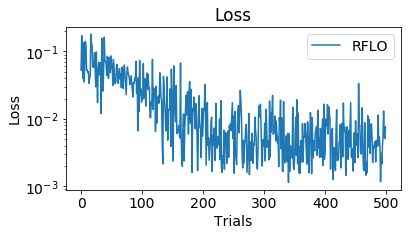

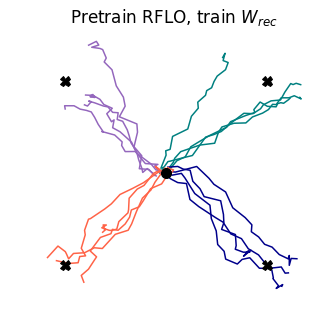

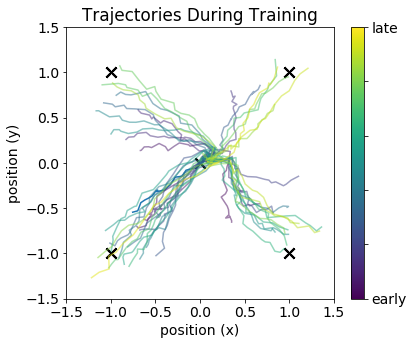

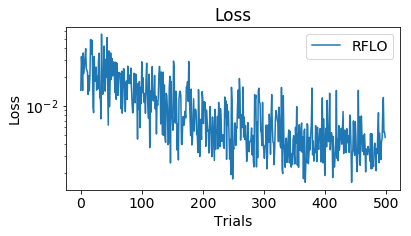

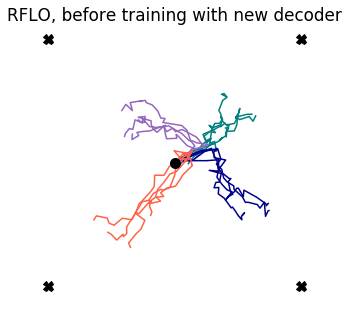

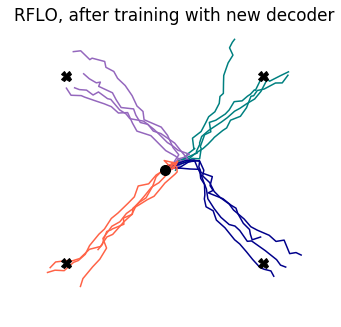

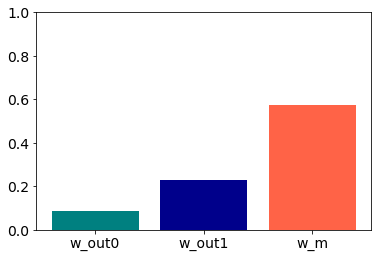

In [6]:
rnn_seed = 72

test_duration = 500







""" Average over multiple seeds """
seeds = [0,1,2,3]#,2,3,4,5]#,22,33,47]

# overlap_w_out0 = 0.5
# n_change_w_out0 = 50

overlaps = [0.5,0.5,0.5,0.5] # 
n_changes = [25,50,110,220] # 
n_units = [25,50,100,200] #
pretrain_durations = [2500,2000,1000,500]
train_durations = [2000,1500,1000,500]


stats = {}
stats['corr1'] = []
stats['corr2'] = []
stats['corr3'] = []
stats['corrcoef'] = []

stats['seeds'] = seeds
stats['overlaps'] = overlaps
stats['n_changes'] = n_changes
stats['n_units'] = n_units
# stats['overlap_w_out0'] = overlap_w_out0
# stats['n_change_w_out0'] = n_change_w_out0
stats['frac_on'] = frac_on

stats['pretrain_durations'] = pretrain_durations
stats['train_durations'] = train_durations
stats['test_duration'] = test_duration
stats['rnn_seed'] = rnn_seed
stats['comments'] = 'vary overlap between M and w_out1'

for seed in seeds:

    corr1_list = []
    corr2_list = []
    corr3_list = []
    corrcoef_list = []
    

    #for overlap,n_change in zip(overlaps,n_changes):

    for n_rec,overlap,n_change,pretrain_duration,train_duration in zip(n_units,overlaps,n_changes,pretrain_durations,train_durations):
        
        """ pretrain """
        # Set RNN Parameters
        params = RNNparams(n_in=4,n_rec=n_rec,n_out=2,tau_rec=10,
                       eta_in=0.1,eta_rec=0.2,eta_out=0.1,
                       sig_in=0.0,sig_rec=0.1,sig_out=0.01,
                       velocity_transform=False, tau_vel = 0.8, dt_vel = 0.1,
                       rng=np.random.RandomState(rnn_seed))
        params.print_params()

        print('>> num units: {:.2f}'.format(n_rec))

        # Initialize RNN
        net0 = RNN(params)
        sim0 = Simulation(net0)
        rflo = RFLO(net0,apply_to=['w_rec'],online=False)
        sim0.run_session(n_trials=pretrain_duration, tasks=[task1,task2,task3,task4], learn_alg=[rflo], probe_types=['loss'], plot=True, plot_freq=20)

        fig0 = plot_trained_trajectories(sim=sim0, tasks=[task1,task2,task3,task4],title='Pretrain RFLO, train '+r'$W_{rec}$')



        
        
        
        """ let overlap between w_out0 and w_out1 be constant """
        w_out1 = choose_aligned_matrix(net0.w_out.copy(),n_change=n_change,overlap=overlap,rng=np.random.RandomState(seed),zero=False,tolerance=0.01,loop=1000)
        """ change overlap between w_out1 and w_m  """
        w_m = choose_aligned_matrix(w_out1,n_change=n_change,overlap=overlap,rng=np.random.RandomState(seed),zero=False,tolerance=0.01,loop=1000)

        # confirm overlap between w_out1 and w_out
        norm, angle = return_norm_and_angle(net0.w_out,w_out1)
        print('\nw_out1 norm: {:.2f}'.format(norm) + '\t w_out vs. w_out1 angle: {:.2f}'.format(angle),end='')

        # confirm overlap between w_out1 and w_m
        norm, angle = return_norm_and_angle(w_out1,w_m)
        print('\nw_m norm: {:.2f}'.format(norm) + '\t w_out1 vs. w_m angle: {:.2f}'.format(angle),end='')

        # confirm overlap between w_out and w_m
        norm, angle = return_norm_and_angle(net0.w_out,w_m)
        print('\nw_m norm: {:.2f}'.format(norm) + '\t w_out vs. w_m angle: {:.2f}'.format(angle),end='')
        
        
        
        
        net1_pre = RNN(params)
        net1_pre.set_weights(w_in=net0.w_in.copy(), w_rec=net0.w_rec.copy())
        net1_pre.set_weights(w_out = w_out1)
        net1_pre.set_weights(w_m = w_m.T)

        # unfortunately I need to make a different network to maintain integrity of pre and post simulations for plotting
        net1 = RNN(params)
        net1.set_weights(w_in=net0.w_in.copy(), w_rec=net0.w_rec.copy())
        net1.set_weights(w_out = w_out1)
        net1.set_weights(w_m = w_m.T)




        """ Track activity with new decoder, before training """

        sim1_pre = Simulation(net1_pre)
        trackvars = TrackVars(net1_pre,apply_to=[]) 
        sim1_pre.run_session(n_trials=test_duration, tasks=[task1,task2,task3,task4], learn_alg=[trackvars], probe_types=['h','err'], plot=False, plot_freq=10)
        #fig = plot_trained_trajectories(sim=sim1_pre, tasks=[task1,task2,task3,task4],title='RFLO, before training with new decoder')

        """ Train with new decoder """

        sim1_train = Simulation(net1)
        rflo = RFLO(net1,apply_to=['w_rec'],online=False)
        sim1_train.run_session(n_trials=train_duration, tasks=[task1,task2,task3,task4], learn_alg=[rflo], probe_types=['h','loss','err'], plot=True, plot_freq=10)

        """ Track activity with new decoder, after training """
        net1_post = RNN(params)
        net1_post.set_weights(w_in=net1.w_in.copy(), w_rec=net1.w_rec.copy())
        net1_post.set_weights(w_out = net1.w_out)
        net1_post.set_weights(w_m = net1.w_m)

        sim1_post = Simulation(net1_post)
        trackvars = TrackVars(net1_post,apply_to=[]) 
        sim1_post.run_session(n_trials=test_duration, tasks=[task1,task2,task3,task4], learn_alg=[trackvars], probe_types=['h','err'], plot=False, plot_freq=10)

        
        fig = plot_trained_trajectories(sim=sim1_pre, tasks=[task1,task2,task3,task4],title='RFLO, before training with new decoder')

        fig = plot_trained_trajectories(sim=sim1_post, tasks=[task1,task2,task3,task4],title='RFLO, after training with new decoder')
        
        
        """ Calculate F fields """
        F_early, score_early = flow_field_data(sim1_pre.session_probes['h'])
        F_late, score_late = flow_field_data(sim1_post.session_probes['h'])

        print('AR early fit {:.3f}, late fit {:.3f}'.format(score_early,score_late))

        Fdata = F_late - F_early

        # separate train and test data from sim1_train
        n_total = len(sim1_train.session_probes['h'])
        n_train = int(0.5 * n_total)
        idx_train = np.random.RandomState(1975+seed).choice(np.arange(0,n_total),size=n_train,replace=False).astype(int)
        idx_test = np.arange(0,n_total)[~idx_train].astype(int)
        #idx_test=idx_train

        h_train = np.asarray(sim1_train.session_probes['h'])[idx_train,:,:,:]
        err_train = np.asarray(sim1_train.session_probes['err'])[idx_train,:,:,:]

        Fpred_w_out = flow_field_predicted(net0.w_out,err_train,h_train)
        Fpred_w_out1 = flow_field_predicted(w_out1,err_train,h_train)
        Fpred_w_m = flow_field_predicted(w_m,err_train,h_train)

        h_test = np.asarray(sim1_train.session_probes['h'])[idx_test,:,:,:]

        corr1 = calculate_flow_field_correlation(Fpred_w_out,Fdata,h_test) # could also sample sim_test
        corr1_list.append(corr1)

        corr2 = calculate_flow_field_correlation(Fpred_w_out1,Fdata,h_test) # could also sample sim_test
        corr2_list.append(corr2)

        corr3 = calculate_flow_field_correlation(Fpred_w_m,Fdata,h_test) # could also sample sim_test
        corr3_list.append(corr3)
        
        fig,ax = plt.subplots(1,1)
        plt.bar([0,1,2],[corr1,corr2,corr3],tick_label=['w_out0','w_out1','w_m'],color=['teal','darkblue','tomato'])
        plt.ylim([0,1])
        plt.show()
        
        
        
        
        
        
    # update
    stats['corr1'].append(corr1_list)
    stats['corr2'].append(corr2_list)
    stats['corr3'].append(corr3_list)
    #stats['corrcoef'].append(corrcoef_list)


stats['RNNparams'] = params

In [10]:
w_out1 = choose_aligned_matrix(net0.w_out.copy(),n_change=220,overlap=0.5,rng=np.random.RandomState(seed),zero=False,tolerance=0.01,loop=1000)


M norm: 1.47	 M angle: 0.49, 64 iterations

In [9]:
""" save dict with unique name """
stats_n_units = stats

""" save dict """

save = True
tag = 'sup-5-24'


if save:
    
    with open(folder+'stats_n_units-'+tag+'.pickle', 'wb') as handle:
        pickle.dump(stats_n_units, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
    print('\nsaved as '+folder+'stats_n_units-'+tag+'.pickle')



saved as figs-2022-5-24/stats_n_units-sup-5-24.pickle


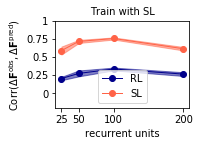

In [16]:
""" Same plot using flow field """
paper = True
save = True

fig,ax = plt.subplots(1,1,figsize=(6,4))

# """ Baseline Result from Main Figure """
# n_samples = len(stats_rflo_m['corr1'])
# mn1 = np.mean(np.asarray(stats_rflo_m['corr1']),axis=0)
# std1 = np.std(np.asarray(stats_rflo_m['corr1']),axis=0)
# sem1 = std1/np.sqrt(n_samples)


""" vary_sig_rec """
n_samples = len(stats_n_units['corr2'])
mn2 = np.mean(np.asarray(stats_n_units['corr2']),axis=0)
std2 = np.std(np.asarray(stats_n_units['corr2']),axis=0)
sem2 = std2/np.sqrt(n_samples)

mn3 = np.mean(np.asarray(stats_n_units['corr3']),axis=0)
std3 = np.std(np.asarray(stats_n_units['corr3']),axis=0)
sem3 = std3/np.sqrt(n_samples)


# plt.plot(overlaps,mn1,'o-',linewidth=1,label=r'$W^{bmi0}$',color='teal')
# plt.fill_between(overlaps,mn1-sem1,mn1+sem1,alpha=0.5,color='teal')

plt.plot(n_units,mn2,'o-',linewidth=1,label='RL',color='darkblue')
plt.fill_between(n_units,mn2-sem2,mn2+sem2,alpha=0.5,color='darkblue')

plt.plot(n_units,mn3,'o-',linewidth=1,label='SL',color='tomato')
plt.fill_between(n_units,mn3-sem3,mn3+sem3,alpha=0.5,color='tomato')


plt.ylim([-0.2,1])
plt.legend(loc=4)
plt.title('Train with SL')
plt.xlabel('recurrent units')
plt.ylabel('Corr'+r'$(\Delta \mathbf{F}^{\mathrm{obs}}, \Delta \mathbf{F}^{\mathrm{pred}})$')

plt.tight_layout()

if paper:
    fig,ax = paper_format(fig=fig,ax=ax,xlabels=[25,50,100,200],ylabels=[0,0.25,0.5,0.75,1],ticksize=10,linewidth=2,ylim=[-.2,1],figsize=(2.25,3))

plt.show()

if save:
    if paper:
        fig.savefig(folder+'sup-n-units.pdf')
    else:
        fig.savefig(folder+'sup-n-units.pdf')


In [14]:
stats_n_units['corr2']

[]